In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
from hexagon_utilities import *
from colors import *
from plot_functions import *

import matplotlib.pyplot as plt

(-1.1, 1.1, -0.9526279441628827, 0.9526279441628827)

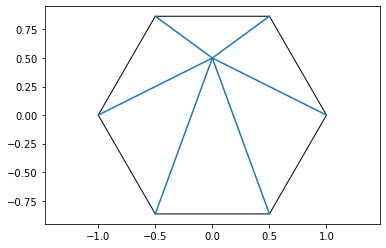

In [9]:
size=1
dist = size/2
h = Hex(0,0, size)
h.get_verts()
h.render(fill=None)

pts = h.get_points_center_rtheta(dist, 0)

p = pts[np.random.randint(6)]
h.connect_pt_to_vertices(p)
#plt.scatter(*p)

plt.axis('equal')

## Idea Behind these sets of Images

1. For each hex in HexGrid, choose an interior point (IP) at random
2. Connect this random IP, connect it every pair of adjacent vertices to make a total of 6 triangles
3. Color each triangle with some High Saturation color.

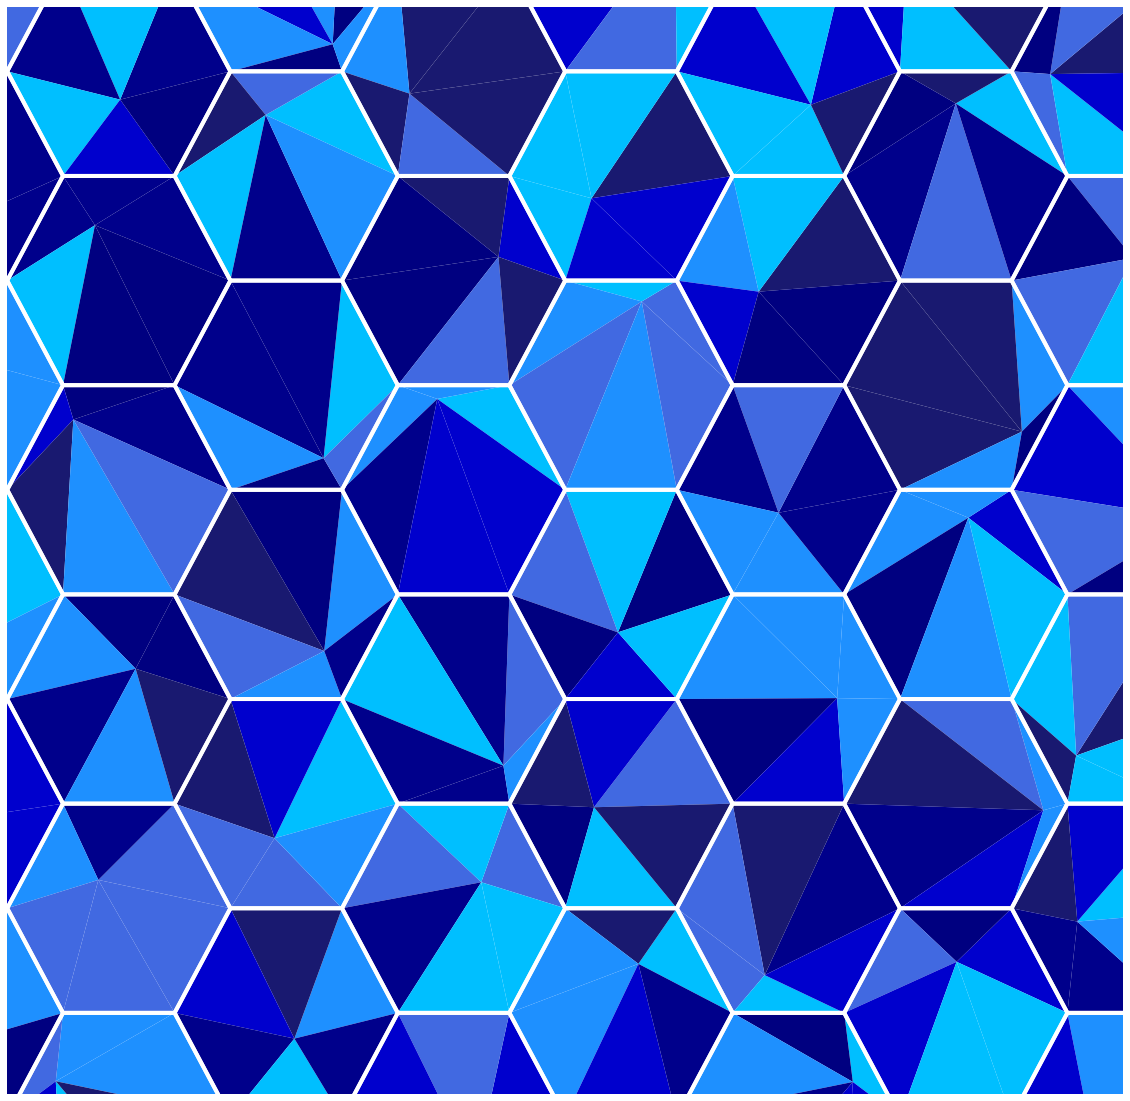

In [40]:
fig, ax = plt.subplots(figsize=(20,20))
size=2
hg = HexGrid(12,15,size, flat=True)

COL = BLUES_HIGH_SAT
COL2 = BLUES_HIGH_SAT


for idx, h in enumerate(hg.hlist):    
    
    dist = size * np.random.uniform(0.2, 0.8)
    theta = np.random.randint(0,90)
    pts = h.get_points_center_rtheta(dist, theta)
    #The specific point is randomly chosen, out of the possible 6
    p = pts[np.random.randint(6)]
    
    #Draw traingles from p to every pair of vertices...
    for vidx, (v1, v2) in enumerate([(x, (x+1)%6) for x in range(6)]):
        pt_list = [p, v1, v2, p]
        if vidx < 3:
            h.render_polygon(pt_list, include_center=False, fc=COL[np.random.randint(len(COL))])
        else:
            h.render_polygon(pt_list, include_center=False, fc=COL2[np.random.randint(len(COL2))])
            
    h.render(fill=None, lw=4, color='white', zorder=3)
            
    
plt.axis('equal')
ax.set_aspect('auto')
ax.set_xbound(lower=-10, upper=10)
#ax.set_xlim(-10, 10)
ax.set_ybound(lower=-10, upper=8)
plt.axis('off')

save_file(fig, 'INT_PTS_POLYGONS_')